In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# read the file
demo_df=pd.read_csv('TravelDataDemos.csv')

In [3]:
#DropNaN
demo_df.dropna(subset=["Education","Region", "Size of manucipality","Household size", "GenderID","Age", "Occupation","Gross income (year)","Social Class", "Education","Status ", "# children in household" ], inplace=True)


In [4]:
#categorise Age 
demo_df['age_bins']=pd.cut(x=demo_df['Age'], bins=[17,20,29,39,49,59,69,79,89,99])
demo_df['age_category']=pd.cut(x=demo_df['Age'], bins=[17,20,29,39,49,59,69,79,89,99],labels=['0','1','2','3','4','5','6','7','8',])
demo_df=demo_df.drop(columns=['Age','age_bins'])


In [5]:
#Cleaning 
demo_df.drop(demo_df.index[demo_df['Occupation']==97],inplace=True)
demo_df.drop(demo_df.index[demo_df['Gross income (year)']==8],inplace=True)
demo_df.drop(demo_df.index[demo_df['Status ']==97],inplace=True)

In [6]:
#find correltaions between varibales 
corr=demo_df[['Region', 'Size of manucipality','Household size', 'GenderID','Occupation','Gross income (year)','Social Class', 'Education','Status ', '# children in household','age_category']].corr()
print(corr)

                           Region  Size of manucipality  Household size  \
Region                   1.000000             -0.310104        0.057948   
Size of manucipality    -0.310104              1.000000       -0.139128   
Household size           0.057948             -0.139128        1.000000   
GenderID                -0.018586             -0.022361        0.008373   
Occupation              -0.024705              0.008106       -0.193622   
Gross income (year)     -0.004415             -0.048210        0.346368   
Social Class             0.033459             -0.011046       -0.209118   
Education               -0.036321              0.041538        0.058775   
Status                   0.060501             -0.122947        0.735215   
# children in household  0.012275             -0.077582        0.763307   

                         GenderID  Occupation  Gross income (year)  \
Region                  -0.018586   -0.024705            -0.004415   
Size of manucipality    -0.022361 

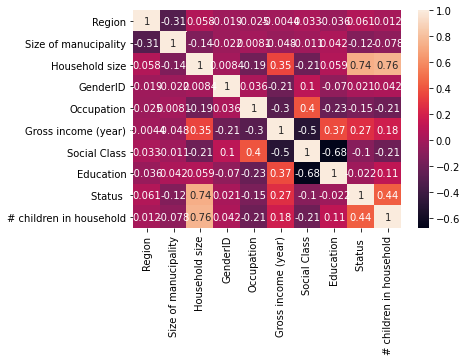

In [7]:
#plot correlation results into heat map 
sns.heatmap(corr, annot=True)
plt.show()

In [8]:
#output reults
demo_df.to_excel('Demo_Refined_withUserID.xlsx')

In [9]:
demo_df.head()

,UserID,Region,Size of manucipality,Household size,GenderID,Occupation,Gross income (year),# children in household,Social Class,Education,Status,age_category
2,1,5.0,6.0,1.0,1.0,2.0,2.0,0.0,5.0,2.0,2.0,4
3,2,3.0,3.0,2.0,2.0,2.0,7.0,0.0,2.0,6.0,4.0,3
5,4,4.0,4.0,5.0,1.0,2.0,5.0,3.0,1.0,4.0,6.0,3
6,5,4.0,5.0,4.0,1.0,2.0,5.0,2.0,2.0,6.0,6.0,3
7,6,2.0,6.0,1.0,1.0,7.0,2.0,0.0,5.0,3.0,2.0,6
